<a href="https://colab.research.google.com/github/tomkart/stable-diffusion-colab/blob/main/RealVisXL_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision transformers diffusers accelerate invisible-watermark


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 63.0 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import StableDiffusionXLPipeline
from PIL import Image
import matplotlib.pyplot as plt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
# Load the RealVisXL model
model_path = "SG161222/RealVisXL_V5.0"  # Or another suitable model

pipe = StableDiffusionXLPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to("cuda")

# Enable attention slicing if you have low VRAM (optional)
pipe.enable_model_cpu_offload()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


model_index.json:   0%|          | 0.00/708 [00:00<?, ?B/s]


A mixture of fp16 and non-fp16 filenames will be loaded.
Loaded fp16 filenames:
[vae/diffusion_pytorch_model.fp16.safetensors, text_encoder/model.fp16.safetensors, text_encoder_2/model.fp16.safetensors, unet/diffusion_pytorch_model.fp16.safetensors]
Loaded non-fp16 filenames:
[unet/diffusion_pytorch_model-00002-of-00002.safetensors, unet/diffusion_pytorch_model-00001-of-00002.safetensors
If this behavior is not expected, please check your folder structure.


Fetching 21 files:   0%|          | 0/21 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/526 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/594 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/574k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/893 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/484 [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00002.safetensors:   0%|          | 0.00/9.99G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.85k [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00002.safetensors:   0%|          | 0.00/282M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/203k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
def generate_image(prompt, negative_prompt=None, num_inference_steps=50, guidance_scale=7.5):
    """
    Generate an image with SDXL/RealVisXL requirements.
    """
    image = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
    ).images[0]
    return image

In [17]:
# Define your text prompt
#positive = "A surreal dreamscape with floating islands, upside-down waterfalls, and a giant clock melting into the sky, vibrant colors, highly detailed, fantasy art style, 8K resolution"
#prompt = f"cinematic still {positive}. emotional, harmonious, vignette, highly detailed, high budget, bokeh, cinemascope, moody, epic, gorgeous, film grain, grainy"
#print(prompt)
prompt = "A massive spaceship orbiting a distant planet with a glowing ring system, stars and galaxies visible in the background, highly detailed, photorealistic, cinematic lighting, 8K resolution"
negative_prompt = "blurry, low quality, cartoon, 3d render"  # Optional



  0%|          | 0/50 [00:00<?, ?it/s]

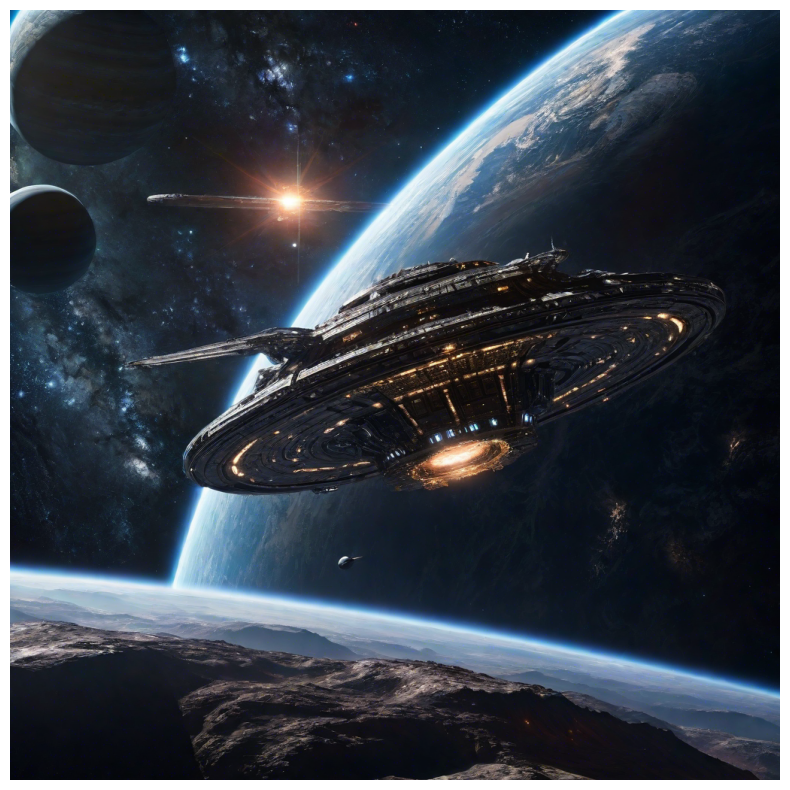

In [18]:
image = generate_image(prompt, negative_prompt)
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()